<a href="https://colab.research.google.com/github/AbihaOmer/Adv.Programming2024/blob/main/task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [23]:
handwritten_mnist = tf.keras.datasets.mnist

In [24]:
handwritten_mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [25]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = handwritten_mnist.load_data()

LABEL: 8

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 138 170 253 201 244 212 222 138  86  22   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  95 253 252 252 252 252 253 252 252 252 252 245  80   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  68 246 205  69  69  69  69  69  69  69  69 205 253 240  50   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 187 252 218 

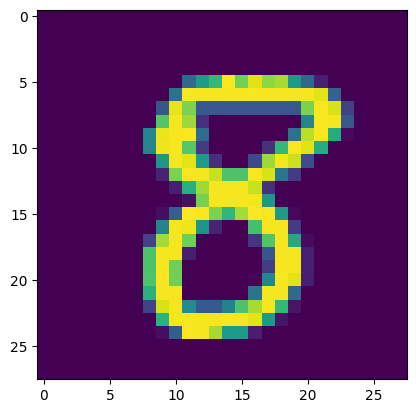

In [27]:


# You can put between 0 to 59999 here
index = 333

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2  38 122 246 255 255 245 121   8   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  57 176 253 253 253 253 253 253 253 155   3   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1 191 253 253 253 

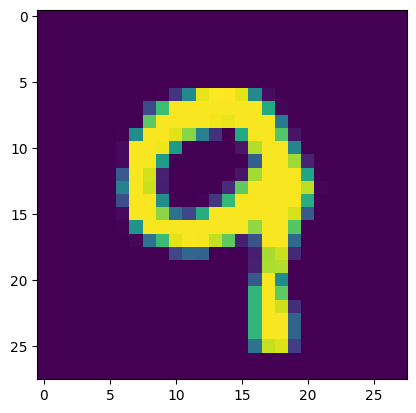

In [28]:
# You can put between 0 to 59999 here
index = 99

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {test_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {test_images[index]}')

# Visualize the image
plt.imshow(test_images[index])

In [29]:
#normalize will transform into grey images
#to normalize divide by 255
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [30]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(128, activation=tf.nn.relu),tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [31]:
#for better understanding
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [32]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=20,verbose=1)

Epoch 1/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2576 - accuracy: 0.9269
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1123 - accuracy: 0.9668
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0786 - accuracy: 0.9765
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0574 - accuracy: 0.9828
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0441 - accuracy: 0.9862
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0351 - accuracy: 0.9892
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0279 - accuracy: 0.9914
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0233 - accuracy: 0.9930
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0180 - accuracy: 0.9945
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.

In [33]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10,verbose=0)

In [34]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 6ms/step - loss: 0.1358 - accuracy: 0.9767


[0.13584858179092407, 0.9767000079154968]

In [35]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.1358 - accuracy: 0.9767


[0.13584858179092407, 0.9767000079154968]